#Introduzione a PyTorch

Mario Fiorino

$\;$

PyTorch è una libreria per il Machine Learning che  semplifica la creazione e l'ottimizzazione di modelli di deep learning.

$\;$


PyTorch si basa su due concetti chiave:

 - Tensori n-dimensionale, simili a Numpy, ma che possono essere eseguiti su GPU.

- Calcolo automatico di gradienti; PyTorch automatizza il calcolo dei gradienti di qualsiasi funzione. Questa caratteristica è fondamentale per l'addestramento di reti neurali (NN).

$\;$

Ref:

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


https://pytorch.org/docs/stable/index.html

https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html



In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time
import random
#
import warnings
warnings.filterwarnings('ignore')


## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm


##Torch
import torch
print("Version_torch : ", torch.__version__)
from torch import nn

Version_torch :  2.2.1+cu121


In [ ]:
# Per impostare il codice in modo che sia riproducibile sempre con gli stessi numeri random.
torch.manual_seed(42) # Setting the seed

##Tensors


Tensori, sono una struttura dati specifica utilizzata in PyTorch per codificare gli input e gli output di un modello (inclusi i parametri del modello).

Questi sono simili agli array NumPy, offrendo però il vantaggio di supportare la GPU che consente di accelerare drasticamente i calcoli.

Ref.

https://pytorch.org/docs/stable/tensors.html#



In [ ]:
#Initialization
#Directly assign values to the tensor during initialization,

# Create a 1-D tensor with values from the interval [start, end) by a given step
x = torch.arange(0,3,step=0.5)
print(x)

# Create a 1D tensor from a list
x = torch.Tensor([1,2,3,4,5,6,7,8])
print(x)

# Create a 2x2 tensor from a nested list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

#Create 4x1 torch tensor of 0's
x = torch.zeros(4,1)
print(x)


# Create a tensor with shape (3, 2, 4) and random values between 0 and 1
x = torch.rand(3, 2, 4)
print(x)

#Creates a 2D tensor with random values sampled from a normal distribution with mean 0 and variance 1
x = torch.randn(2, 3)
print(x)


#BxCxHxW : number of batches, channels, height, width
x = torch.randn(4, 2, 1, 3)
print(x)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])
tensor([1., 2., 3., 4., 5., 6., 7., 8.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[0.],
        [0.],
        [0.],
        [0.]])
tensor([[[0.0328, 0.2669, 0.5425, 0.2723],
         [0.9781, 0.1694, 0.8793, 0.3660]],

        [[0.6325, 0.3422, 0.9015, 0.9097],
         [0.6291, 0.8456, 0.5797, 0.7589]],

        [[0.3971, 0.0028, 0.1538, 0.2232],
         [0.7260, 0.0514, 0.4738, 0.9980]]])
tensor([[-0.6922, -1.7764, -0.0165],
        [ 0.6594,  0.6408, -0.6627]])
tensor([[[[-1.2312, -2.2145,  2.3087]],

         [[ 0.8383,  1.7491,  0.0368]]],


        [[[-0.5495, -0.1759, -0.9001]],

         [[-0.2427,  0.8748,  2.8902]]],


        [[[-2.1730,  0.4274, -0.1049]],

         [[-0.2165,  0.2356,  0.5709]]],


        [[[ 1.7692,  0.8347,  1.1873]],

         [[-0.1427,  0.0809, -0.1698]]]])


####Operations

In [ ]:
#Operations

x1 = torch.Tensor([[1, 0], [1, 2]])
x2 = torch.Tensor([[5, 6], [7, 8]])
y = x1 + x2
print(y) # creates a new tensor containing the sum of the two inputs

#In-place operations
x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2) #applied directly on the memory of a tensor. The operation modifies x2, making its previous value inaccessible

tensor([[ 6.,  6.],
        [ 8., 10.]])
X1 (after) tensor([[1., 0.],
        [1., 2.]])
X2 (after) tensor([[ 6.,  6.],
        [ 8., 10.]])


In [ ]:
#torch.matmul: Performs the matrix product over two tensors

x = torch.Tensor([0, 1, 2])

print("x=", x)
print(x.dtype)

w =  torch.Tensor([[1, 0, 2, 1],
                   [0, 1, 0, 1 ],
                   [5, 5, 0, 5]])
print("w=",w)
print(w.dtype)

h = torch.matmul(x, w) #  matrix product: has the number of rows of the first and the number of columns of the second matrix
print("h", h)

x= tensor([0., 1., 2.])
torch.float32
w= tensor([[1., 0., 2., 1.],
        [0., 1., 0., 1.],
        [5., 5., 0., 5.]])
torch.float32
h tensor([10., 11.,  0., 11.])


In [ ]:
# torch.bmm : Performs a batch matrix-matrix product

input_b1 = torch.Tensor([[[ 1,  0,  1,    0]],
                          [[ 1,  3, -2,    4]],
                          [[ 2, -1,  0,  -1 ]]])  # (b × n × m)

print(input_b1)
print(input_b1.size())
print("")

batch2 = torch.Tensor([   [[ 1,  0,  1,    0,   1],
                           [ 2,  2,  2,    2,   2],
                           [ 3,  1,  1,    0,   0],
                           [ 1,  5,  1,    0,   0]],

                          [[ -1,  0,  -1,    0,   -1],
                           [  2,  -2,  -2,    -2,   -2],
                           [  3,  -1,  -1,    0,   0],
                           [ -1,  -5,  -1,    0,   0]],

                          [[ 2,  0,  1,    0,   1],
                           [ 10,  9,  2,    2,   2],
                           [ 3,  1,  9,    0,   0],
                           [ 1,  5,  9,    7,   0]], ])  # (b × m × p)
print(batch2)
print(batch2.size())
print("")

res = torch.bmm(input_b1, batch2) # (b × n × p)
print(res)
print(res.size())
# Calculated by performing b matrix multiplications of : res_i = input_i @ batch2_i  ; for i in b size
# In this case, b = 3,  we have just:
# res_0 = [[  4.,   1.,   2.,   0.,   1.]]
# result result obtained between [[ 1.,  0.,  1.,  0.]]   @  [[ 1.,  0.,  1.,  0.,  1.],
       #                                                     [ 2.,  2.,  2.,  2.,  2.],
       #                                                     [ 3.,  1.,  1.,  0.,  0.],
       #                                                     [ 1.,  5.,  1.,  0.,  0.]]

#res_1 = [[ -5., -24.,  -9.,  -6.,  -7.]]
#res_2 = [[ -7., -14.,  -9.,  -9.,   0.]]

tensor([[[ 1.,  0.,  1.,  0.]],

        [[ 1.,  3., -2.,  4.]],

        [[ 2., -1.,  0., -1.]]])
torch.Size([3, 1, 4])

tensor([[[ 1.,  0.,  1.,  0.,  1.],
         [ 2.,  2.,  2.,  2.,  2.],
         [ 3.,  1.,  1.,  0.,  0.],
         [ 1.,  5.,  1.,  0.,  0.]],

        [[-1.,  0., -1.,  0., -1.],
         [ 2., -2., -2., -2., -2.],
         [ 3., -1., -1.,  0.,  0.],
         [-1., -5., -1.,  0.,  0.]],

        [[ 2.,  0.,  1.,  0.,  1.],
         [10.,  9.,  2.,  2.,  2.],
         [ 3.,  1.,  9.,  0.,  0.],
         [ 1.,  5.,  9.,  7.,  0.]]])
torch.Size([3, 4, 5])

tensor([[[  4.,   1.,   2.,   0.,   1.]],

        [[ -5., -24.,  -9.,  -6.,  -7.]],

        [[ -7., -14.,  -9.,  -9.,   0.]]])
torch.Size([3, 1, 5])


####Changing the shape of a tensor

In [ ]:
x = torch.arange(6)
print("x=", x)

x = x.view(2, 3)
print("x=", x)

#Returns a view of the original tensor input with its dimensions permuted.
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("x=", x)

#NOTE
x = torch.arange(6).view(6, 1).to(torch.float32) # # We can also stack multiple operations in a single line
print("x=", x)
print(x.dtype)

x= tensor([0, 1, 2, 3, 4, 5])
x= tensor([[0, 1, 2],
        [3, 4, 5]])
x= tensor([[0, 3],
        [1, 4],
        [2, 5]])
x= tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])
torch.float32


####Squeeze/Unsqueeze a tensor


In [ ]:
#Squeeze the tensor
#When we squeeze a tensor, the dimensions of size 1 are removed.
#Input tensor is of shape: (m×1×n×1) then the output tensor after squeeze will be of shape: (m×n).
input_s = torch.ones(3,1,4)
print(input_s,"\n Size:",input_s.size(),"\n")
output_s = torch.squeeze(input_s)
print("After squeeze\n", output_s,"\n Size:",output_s.size())

tensor([[[1., 1., 1., 1.]],

        [[1., 1., 1., 1.]],

        [[1., 1., 1., 1.]]]) 
 Size: torch.Size([3, 1, 4]) 

After squeeze
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 
 Size: torch.Size([3, 4])


In [ ]:
# Unsqueeze a Tensor:
# When we unsqueeze a tensor, a new dimension of size 1 is inserted at the specified position.
# Always an unsqueeze operation increases the dimension of the output tensor.
# Input tensor is of shape:  (m×n) and we want to insert a new dimension at position 1 then the output tensor after unsqueeze will be of shape: (m×1×n).

input_u = torch.arange(5, dtype=torch.float)
print("Input tensor:", input_u)
print("Size of input Tensor before unsqueeze:",
      input_u.size())

print("\n")

output_u = torch.unsqueeze(input_u, dim=0)
print("Tensor after unsqueeze with dim=0:", output_u)
print("Size after unsqueeze with dim=0:",
      output_u.size())

print("\n")

output_u = torch.unsqueeze(input_u, dim=1)
print("Tensor after unsqueeze with dim=1:\n", output_u)
print("Size after unsqueeze with dim=1:",
      output_u.size())

#https://www.geeksforgeeks.org/how-to-squeeze-and-unsqueeze-a-tensor-in-pytorch/

Input tensor: tensor([0., 1., 2., 3., 4.])
Size of input Tensor before unsqueeze: torch.Size([5])


Tensor after unsqueeze with dim=0: tensor([[0., 1., 2., 3., 4.]])
Size after unsqueeze with dim=0: torch.Size([1, 5])


Tensor after unsqueeze with dim=1:
 tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
Size after unsqueeze with dim=1: torch.Size([5, 1])


####Indexing

In [ ]:
x= torch.Tensor([[ 1,   0,  8,    33],
                 [ 1,  3, -2,    4],
                 [ 7, -9,  19,  -29]])

print(x)
print(x.size())

k = x[:, 0]   # First column
print(k)


k = x[1]      # Second row
print(k)

k = x[:2, -1] # First two rows, last column
print(k)

k = x[:, 1:3]  # # Middle two column
print(k)

tensor([[  1.,   0.,   8.,  33.],
        [  1.,   3.,  -2.,   4.],
        [  7.,  -9.,  19., -29.]])
torch.Size([3, 4])
tensor([1., 1., 7.])
tensor([ 1.,  3., -2.,  4.])
tensor([33.,  4.])
tensor([[ 0.,  8.],
        [ 3., -2.],
        [-9., 19.]])


####GPU support

Una GPU può eseguire molte migliaia di piccole operazioni in parallelo, rendendola estremamente efficiente nell'eseguire operazioni su matrici nelle reti neurali di grandi dimensioni.

In [ ]:
#controlliamo se hai una GPU disponibile:

gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")
#Per la disponibilità su Colab : Runtime -> Cambia tipo di Runtime

Is the GPU available? True


In [ ]:
# Per impostazione predefinita, tutti i tensori creati vengono archiviati nella CPU.
# Possiamo inviare un tensore alla GPU utilizzando la funzione .to(...) o .cuda().
# In genere è però una buona pratica definire un oggetto device nel codice che punti alla GPU, o altrimenti alla CPU.
# Possiamo specificare il device come segue:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

# Qui creiamo un tensore e lo inseriamo nell'oggetto device definito
x = torch.zeros(2, 3)
x = x.to(device)
print("x=", x)
# Nel caso ci sia una GPU, ora dovresti vedere l'attributo device='cuda:0' stampato accanto al tuo tensore.
# Lo zero accanto a cuda indica che questo è il dispositivo GPU zero-esimo sul tuo computer.


Device cuda
x= tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [ ]:
#CPU vs GPU:
# Confrontiamo il tempo di esecuzione:

x = torch.randn(3000, 3000)
n_iterations = 200

## CPU version
times = np.zeros(n_iterations)
for i in range(n_iterations):
   start_time = time.time()
   _ = torch.matmul(x, x)
   end_time = time.time()
   times[i] = end_time - start_time

mean_time = np.mean(times)
print(f"\n Average time over {n_iterations} executions on CPU: {(mean_time):6.5f}s")
print(f"Total computation time on CPU: {(np.sum(times)):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU

times = np.zeros(n_iterations)
for i in range(n_iterations):
# CUDA is asynchronous, so we need to use different timing functions
   start = torch.cuda.Event(enable_timing=True)
   end = torch.cuda.Event(enable_timing=True)
   start.record()
   _ = torch.matmul(x, x)
   end.record()
   torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
   times[i] = 0.001 * start.elapsed_time(end) # Milliseconds to seconds

mean_time = np.mean(times)
print(f"\n Average time over {n_iterations} executions on GPU: {(mean_time):6.5f}s")
print(f"Total computation time on GPU: {(np.sum(times)):6.5f}s")

# Le operazioni matmul sono centrali nelle reti neurali,
# qui intuiamo il grande vantaggio di addestrare una NN su una GPU.


 Average time over 200 executions on CPU: 0.47949s
Total computation time on CPU: 95.89803s

 Average time over 200 executions on GPU: 0.01433s
Total computation time on GPU: 2.86569s


Quando si generano numeri casuali, il seed tra CPU e GPU non è sincronizzato.

Pertanto, dobbiamo impostare il seed sulla GPU separatamente per garantire un codice riproducibile.

Tieni presente che, a causa delle diverse architetture GPU, l'esecuzione dello stesso codice su GPU diverse non garantisce gli stessi numeri casuali.

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

####Numpy to Tensor  +  Tensor to Numpy



In [ ]:
#Numpy to Tensor
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)
print("To Numpy array:", np_arr,"--> PyTorch tensor:", tensor )

#Tensor to Numpy
tensor = torch.arange(4)
np_arr = tensor.numpy()
print("To PyTorch tensor:", tensor,"--> Numpy array:", np_arr )
# The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU
# In case you have a tensor on GPU
tensor = tensor.to(device)
# np_arr = tensor.numpy() # TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
np_arr = tensor.cpu().numpy()
print("\n",type(np_arr))


To Numpy array: [[1 2]
 [3 4]] --> PyTorch tensor: tensor([[1, 2],
        [3, 4]])
To PyTorch tensor: tensor([0, 1, 2, 3]) --> Numpy array: [0 1 2 3]

 <class 'numpy.ndarray'>


##Implementazione manualmente con Numpy

Il nostro obiettivo è trovare i parametri di un polinomio di terzo grado per approssimare il comportamento di una funzione seno.

Per raggiungere questo scopo, utilizzeremo il metodo di ottimizzazione della discesa del gradiente, minimizzando l'errore quadratico medio (MSE) tra l'output del polinomio e l'output reale della funzione seno.

$\;$

Promemoria:

1.
Le reti neurali non sono altro che funzioni matematiche molto complesse. Immesso un input, una rete neurale manipola tale input, in genere attraverso le seguenti operazioni: moltiplicazioni tra matrici di "weights" e l'input stesso, seguite da somme con vettori chiamati bias.


$\;$

2.
Il gradiente riveste un ruolo fondamentale negli algoritmi di Machine Learning quando cerchiamo di massimizzare o minimizzare le funzioni di costo rispetto ai parametri del modello; poiché ai massimi  e ai minimi locali, il vettore del gradiente di una funzione è zero.

Esempio:

Data la funzione

$f(x,y, z) = x^2 + y + z^3$

il gradiente è dato:

$\nabla f = [2x, 1, 3z^2  ] $

$\;$

3.
Il calcolo effettivo del gradiente di funzioni composte si basa sulla "chain rule" delle derivate; ovvero una formula che esprime la derivata di una funzione composta in termini delle derivate delle singole funzioni.

In [ ]:
#Il codice prende ispirazione da https://github.com/jcjohnson/pytorch-examples

# Create random input and output dataset
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)


# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3

for t in range(5_000+1):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute loss
    loss = np.square(y_pred - y).mean()
    # np.square(y_pred - y) is numpy vector of 2000 element

    # Debug
    if t % 1_000 == 0:
        print("Step=",t," - loss= ", loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.mean()
    grad_b = (grad_y_pred * x).mean()
    grad_c = (grad_y_pred * x ** 2).mean()
    grad_d = (grad_y_pred * x ** 3).mean()
    #Every grad_... is numpy vector of 2000 element

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {round(a,4)} + {round(b,4)} x + {round(c,4)} x^2 + {round(d,4)} x^3')

#Test
print("\nTest ")
pp = random.uniform(-math.pi, math.pi )
#print(pp)
y = np.sin(pp)
print(y)
y_pred = a + b * pp + c * pp ** 2 + d * pp ** 3
print(y_pred)

#Accuracy
x1 = np.linspace(-math.pi, math.pi, 1000)
true_values = np.sin(x1)
prev =  a + b * x1 + c * x1 ** 2 + d * x1 ** 3

accurate_count = np.sum(np.abs(prev - true_values) <= 0.1)
#Note: np.abs(prev - true_values) <= 0.5) = [ True  False  True  True False False True ... ]
total_count = len(x1)
accuracy = (accurate_count / total_count) * 100
print("")
print(f"The accuracy on 1000 sample: {accuracy:.2f}%")

Step= 0  - loss=  177.0530801944618
Step= 1000  - loss=  0.12803274644701135
Step= 2000  - loss=  0.02488252256304115
Step= 3000  - loss=  0.007857207758341764
Step= 4000  - loss=  0.004997318795589698
Step= 5000  - loss=  0.0045101370536094155
Result: y = 0.0145 + 0.853 x + -0.0025 x^2 + -0.0928 x^3

Test 
0.9877140293201857
1.0021944521294448

The accuracy on 1000 sample: 96.00%


####.sum() oppure .mean() ?

La funzione costo complessiva è tipicamente determinata come la media o la somma dei valori delle singole funzioni costo ottenute dai singoli esempi del training dataset. Questo principio, somma o media, si applica anche nel determinare i gradienti complessivi di ogni parametro del modello.

Tuttavia, quando si tratta di somme, ciò comporta una funzione loss complessiva con valori maggiori rispetto ad una loss ottenuta con una media, il che implica la necessità di tassi di apprendimento (learning_rate) più bassi.  Nonostante ciò, l'algoritmo converge.


In [ ]:
# Il codice prende ispirazione da https://github.com/jcjohnson/pytorch-examples

# Create random input and output dataset
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)


# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

for t in range(5_000+1):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 1_000 == 0:
        print("Step=",t," - loss= ", loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    # Update the parameters of the model in the direction of the gradients
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {round(a,4)} + {round(b,4)} x + {round(c,4)} x^2 + {round(d,4)} x^3')

#Test
print("\nTest ")
pp = random.uniform(-math.pi, math.pi )
#print(pp)
y = np.sin(pp)
print(y)
y_pred = a + b * pp + c * pp ** 2 + d * pp ** 3
print(y_pred)


#Accuracy
x1 = np.linspace(-math.pi, math.pi, 1000)
true_values= np.sin(x1)
prev =  a + b * x1 + c * x1 ** 2 + d * x1 ** 3

accurate_count = np.sum(np.abs(prev - true_values) <= 0.1)
total_count = len(x1)
accuracy = (accurate_count / total_count) * 100
print("")
print(f"The accuracy on 1000 sample: {accuracy:.2f}%")

Step= 0  - loss=  169667.21905858643
Step= 1000  - loss=  103.70884188664972
Step= 2000  - loss=  11.271599632525362
Step= 3000  - loss=  8.885928140763633
Step= 4000  - loss=  8.819194543735808
Step= 5000  - loss=  8.817227133276948
Result: y = 0.0003 + 0.8567 x + -0.0 x^2 + -0.0933 x^3

Test 
-0.8259909041394413
-0.9055354956664827

The accuracy on 1000 sample: 95.80%


## Autograd

Il pacchetto autograd in PyTorch implementa la differenziazione automatica.

Quando si utilizza Autograd, prima si registrà un **computational graph**, ovvero il flusso di calcolo che porta dai dati di input ai risultati finali: i nodi nel grafo saranno tensori, e gli archi saranno operazioni che producono tensori di output da tensori di input.

Ripercorrendo questo grafo (partendo dall'output), sarà calcolato (usando la chain rule delle derivate) il gradiente di ogni parametro rispetto la funzione di riferimento (in una NN la loss).


$\;$

Nota tecnica:

Se x è un tensore che ha x.requires_grad=True allora x.grad è un altro tensore che memorizza il valore del gradiente di x rispetto alla funzione selezionata in $\verb|.backward()|$.

$\;$

Ref:


https://pytorch.org/docs/stable/notes/autograd.html

https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html


https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/



###Introduzione all'uso del pachetto Autograd

In [ ]:
# codice ispirato https://www.geeksforgeeks.org/graphs-automatic-differentiation-and-autograd-in-pytorch/

#!pip install torchviz
#from torchviz import make_dot

# Assign any value for x as tensor form
# Set requires_grad=True So, that autograd will record the operations
x=torch.tensor(7.0,requires_grad=True)
print("x=",x)

# Define the function
f = (x**2)+ x + 3

# Differentiate using torch
# Uses backward function to compute the gradient value
f.backward()

# Print the derivative value of y
# i.e dy/dx = 2x + 1  = 2 X 7.0 + 1  = 15
print("x.grad=",x.grad)


x= tensor(7., requires_grad=True)
x.grad= tensor(15.)


In [ ]:
#A Simple Neural Network

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Ref :  https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    # Define layers: Linear layer with 1 input feature and 2 output neuron
    self.linear1 = nn.Linear(1, 3,bias=False) ### you get : 1x3 weight matrix
    # Define layers: Linear layer with 2 input feature and 1 output neuron
    self.linear2 = nn.Linear(3, 1,bias=True) ### you get : 3x1 weight matrix and a 1 bias

  # Define the forward pass of the network
  def forward(self, x):
    out = self.linear1(x)
    out= nn.functional.sigmoid(out)  # Define activation function(Sigmoid)
    out = self.linear2(out)
    out= nn.functional.sigmoid(out)
    return out

# Input
in_tensor= torch.tensor([0.9])
print("in_tensor=",in_tensor)
print("in_tensor.requires_grad:", in_tensor.requires_grad)
#label
label_tensor = torch.ones(1)

model_NN = Net()
print("\n Model:")
print(model_NN)
print("")

print("Prev model input",model_NN(in_tensor))
print("")

#Define fuction y (i.e. the loss)
y = (model_NN(in_tensor) - label_tensor)**2
print("y.requires_grad:", y.requires_grad)
print("")

# Zero the gradient buffers of all parameters
# Before calculating the gradients again, we need to ensure that they are all zero.
# This is because by default, gradients are accumulated in buffers( i.e, not overwritten) whenever .backward()  is called.
model_NN.zero_grad()


# Backward pass:
# compute automatically gradient of the y with respect to all the learnable
# parameters of the model. Internally, the parameters of each Module are stored
# in Tensors with requires_grad=True, so this call will compute gradients for
# all learnable parameters in the model.
y.backward()


# Context manager: with torch.no_grad, Why?
# 1.General answer :
# while, we are performing updating weights, we don't compute gradients, and thus, don't need to store these values;
#  it will lead to useless consumption of memory.
# Note the print output: 'param.requires_grad=True': this is a "factory function exception" . For more info : https://pytorch.org/docs/stable/generated/torch.no_grad.html
# 2.Practical answer relating to the specific case:
# Whitout 'torch.no_grad()'->  RuntimeError: a leaf Variable that requires grad is being used in an in-place operation
#  in line code : 'param -= 0.5 * param.grad'
# PyTorch doesn’t allow in-place operations on leaf variables that have requires_grad=True (such as parameters of your model) because the developers could not decide how such an operation should behave.
# Note: If require_grad is False then it will be a leaf tensor. For tensors that have requires_grad which is True, they will be leaf Tensors if they were created by the user(Eg. weights of your neural network
with torch.no_grad():
    for name, param in model_NN.named_parameters():
            print(f"Param name : {name}, Shape: {param.size()}")
            print("In =",param)
            print("Gradient:\n", param.grad)
            param -= 0.5 * param.grad
            print("Update =",param,"\n")

print("Prev model update",model_NN(in_tensor))


in_tensor= tensor([0.9000])
in_tensor.requires_grad: False

 Model:
Net(
  (linear1): Linear(in_features=1, out_features=3, bias=False)
  (linear2): Linear(in_features=3, out_features=1, bias=True)
)

Prev model input tensor([0.4526], grad_fn=<SigmoidBackward0>)

y.requires_grad: True

Param name : linear1.weight, Shape: torch.Size([3, 1])
In = Parameter containing:
tensor([[-0.1075],
        [-0.5797],
        [-0.3493]], requires_grad=True)
Gradient:
 tensor([[ 0.0165],
        [-0.0032],
        [-0.0262]])
Update = Parameter containing:
tensor([[-0.1157],
        [-0.5781],
        [-0.3362]], requires_grad=True) 

Param name : linear2.weight, Shape: torch.Size([1, 3])
In = Parameter containing:
tensor([[-0.2711,  0.0561,  0.4407]], requires_grad=True)
Gradient:
 tensor([[-0.1291, -0.1010, -0.1145]])
Update = Parameter containing:
tensor([[-0.2066,  0.1066,  0.4979]], requires_grad=True) 

Param name : linear2.bias, Shape: torch.Size([1])
In = Parameter containing:
tensor([-0.2681]

###Implementazione del polinomio precedente con Autograd

Nel codice seguente, implementeremo lo stesso polinomio sopra descritto. Tuttavia, per ottimizzare l'efficienza, sfrutteremo i tensori e la differenziazione automatica di PyTorch (che automatizza il calcolo della backpropagation).

In [ ]:
##Il codice prende ispirazione da https://github.com/jcjohnson/pytorch-examples

# Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example;
# now we no longer need to manually implement the backward pass

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.

# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
# PyTorch will track the operations if .requires_grad attribute it set to True
# and will create a computation graph from these operations.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-3

num_iter= 3_000

for t in range(num_iter+1):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).mean()
    #loss ~  tensor(3.5625, device='cuda:0', grad_fn=<MeanBackward0>)
    #Note:
    #Each node of the computation graph has automatically defined a function for calculating
    #the gradients with respect to its inputs: grad_fn

    #Debug
    if t % 5_00 == 0:
        print("Step=",t," - loss= ", loss.item())


    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    with torch.no_grad():
        a -= learning_rate * a.grad
        #a.grad ~ tensor(-27.5469, device='cuda:0')
        #a      ~ tensor(-1.2682, device='cuda:0', requires_grad=True)
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # I.e. : If we call the backward function on the loss while the parameter gradients are non-zero from the previous batch,
        # the new gradients would actually be added to the previous ones instead of overwriting them.
        # (This is done because a parameter might occur multiple times in a computation graph,
        # and we need to sum the gradients in this case instead of replacing them.)
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


#Accuracy - torch
x1 = torch.linspace(-math.pi, math.pi, 1000, dtype=dtype)
true_values= torch.sin(x1)
prev =  a + b * x1 + c * x1 ** 2 + d * x1 ** 3

prev = prev.detach().numpy() # untimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
true_values= true_values.numpy()
accurate_count = np.sum(np.abs(prev - true_values) <= 0.1)
total_count = len(x1)
accuracy = (accurate_count / total_count) * 100
print("")
print(f"The accuracy on 1000 sample: {accuracy:.2f}%")

Step= 0  - loss=  155.4891357421875
Step= 500  - loss=  0.6710086464881897
Step= 1000  - loss=  0.2607576251029968
Step= 1500  - loss=  0.10369838029146194
Step= 2000  - loss=  0.043141718953847885
Step= 2500  - loss=  0.019625334069132805
Step= 3000  - loss=  0.01042767334729433
Result: y = 0.09340956807136536 + 0.7931990623474121 x + -0.016114702448248863 x^2 + -0.08429212123155594 x^3

The accuracy on 1000 sample: 71.20%


##Implementare una Rete Neurale in PyTorch

In questo codice, viene implementata una semplice rete neurale utilizzando il modulo torch.nn: questo offre una buona varietà di classi predefinite per la costruzione di reti neurali, tra cui: layer lineari, funzioni di attivazione, funzioni di loss

Il dataset utilizzato è Fashion-MNIST, che contiene immagini di capi di abbigliamento.

https://arxiv.org/abs/1708.07747




####Importa il Dataset Fashion-MNIST

Per un Custom Dataset, vedere:

 https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
# Ref:
# https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

####Visualizza il contenuto del Dataset

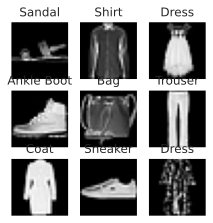

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(3.5, 3.5))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx] # qui campiona

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

####Preparazione dei dati: DataLoader

Per semplificarci la vita, e caricare ed elaborare il dataset in modo efficiente, utilizziamo la classe DataLoader di Torch. Questa classe avvolge un iterabile sul nostro set di dati, supportando e semplificando varie operazioni come il caricamento automatico dei dati in batch.

In pratica, se definiamo una dimensione del batch di 64. Ciò significa che ogni elemento nell'iteratore DataLoader restituirà un batch contenente 64 elementi del dataset, ognuno composto da una coppia di feature-label corrispondenti.


In [ ]:
# Number of sample in batch
batch_size = 16

# Create data loaders
train_dl= DataLoader(training_data, batch_size = batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=True)

#shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
#https://pytorch.org/docs/stable/data.html

Shape of an element in the Dataloader [number of batches, channels, H, W]: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16]) "---" <built-in method type of Tensor object at 0x7f3bc144f970>
One Image in batch shape= torch.Size([28, 28])
Respective label= tensor(2)


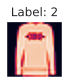

In [ ]:
#Select a (the first) batch of 64 features and labels
X,y = next(iter(train_dl))
print(f'Shape of an element in the Dataloader [number of batches, channels, H, W]: {X.shape}') #BxCxHxW : number of batches, channels, height, width
print(f'Labels batch shape: {y.shape} "---" {y.type}')

#Sample an immage from batch X
sample_idx= random.randint(0,batch_size)
image = X[sample_idx].squeeze()
print("One Image in batch shape=", image.shape)
label = y[sample_idx]
print("Respective label=", label)

# plot
figure = plt.figure(figsize=(1, 1))
plt.title(f"Label: {label}")
plt.imshow(image)
plt.axis("off")
plt.show()


####Creazione del modello

Per definire la nostra rete neurale in PyTorch, creiamo una classe che eredita da nn.Module. Poi:

- Definizione degli strati:

 All'interno della funzione $\verb|__init__| $ , definiamo i layer che compongono la rete neurale. Ogni strato viene creato utilizzando una classe appropriata come nn.Linear per strati lineari o nn.Conv2d per strati convoluzionali.

- Specifica del flusso dei dati:

  Nella funzione $\verb|forward| $, definiamo come i dati fluiranno attraverso la rete neurale. Questo avviene collegando gli strati tra loro in un ordine specifico.



In [ ]:
# To accelerate operations in the neural network, we move it to the GPU or MPS if available.
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [ ]:
class Fashion_NN(nn.Module):

    def __init__(self):
        super(Fashion_NN, self).__init__()

        self.flatten = nn.Flatten()

        # nn.Linear is a module provided by PyTorch that applies a linear transformation to the incoming data.
        # i.e. outptu = input @ weights + bias
        # in_features and out_features, represent the number of input and output features, respectively.
        # When an nn.Linear object is created, it randomly initializes a weight matrix and a bias vector.
        # The size of the weight matrix is out_features x in_features,
        # The size of the bias vector is out_features.
        ## To see the weights :  use: .weight
        # bias (bool) – If set to False, the layer will not learn an additive bias. Default: True

        self.layer1 = nn.Linear(in_features=28*28, out_features=512, bias = True) ## you get : 784x512 weight matrix and a 1x1 bias vector
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 10)


    def forward(self, x):

        x = self.flatten(x)
        out = self.layer1(x)
        # Use the rectified-linear activation function over x
        out = nn.functional.relu(out)

        out = self.layer2(out)
        out = nn.functional.relu(out)
        #out = self.drop(out)

        logits = self.layer3(out)

        return logits

In [ ]:
#Model info

model = Fashion_NN().to(device)
print(model)

Fashion_NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
# NN test

my_nn = Fashion_NN()
result = my_nn(X[0]) # from X,y = next(iter(train_dl)) , see before
print (result)

tensor([[-0.0097, -0.0350, -0.0654, -0.0099, -0.0930, -0.0237,  0.0911,  0.1995,
         -0.0121, -0.0503]], grad_fn=<AddmmBackward0>)


####Ottimizzazione dei parametri del modello

L'addestramento di un modello avviene in modo graduale, attraverso cicli iterativi. In ogni ciclo, il modello formula una previsione sul risultato, valuta l'errore rispetto al risultato reale (loss), calcola quanto ogni parametro influenza tale errore e, infine, regola i parametri stessi per minimizzarlo. Questo processo discesa del gradiente, permette al modello di migliorare le sue prestazioni passo dopo passo.

$\;$

Note Tecniche

Perché dobbiamo usare $\verb|.zero_grad()|$ o $\verb|optimizer.zero_grad()|$  in PyTorch?

*In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behavior is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches.So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call.*

*Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).*

Ref:

https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch

In [ ]:
# test_loop  evaluates the model’s performance against our test data.

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    # model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \t Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (100*correct)


In [ ]:
# instantiate the NN
my_nn = Fashion_NN()

# Loss Function
loss_fn = nn.CrossEntropyLoss()
#nn.CrossEntropyLoss,  è una combinazione di nn.LogSoftmax e nn.NLLLoss :
# normalizzerà i logit e calcolerà l'errore di previsione.

learning_rate = 1e-3

# Lists for visualization of loss and accuracy
loss_list = []
accuracy_list = []

######Opzione 1 - Autograd implementation

In [ ]:
#Option 1 - Autograd implementation

nr_epochs = 4

for t in range(nr_epochs):

    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_dl)

    #model.train()
    for batch, (X, y) in enumerate(train_dl):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = my_nn(X)

        # Compute and print loss
        loss = loss_fn(pred, y)

        # Zero the gradients before running the backward pass.
        my_nn.zero_grad()

        # Backpropagation
        loss.backward()

        # Update the weights using gradient descent.
        with torch.no_grad():
          for param in my_nn.parameters():
              param -= learning_rate * param.grad


        #Debug
        if batch % 1_200 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{60000:>5d}]")
            loss_list.append(loss)

    ac = test_loop(test_dl , my_nn, loss_fn)
    accuracy_list.append(ac)

print("Done!")

Epoch 1
-------------------------------
loss: 2.280143  [   16/60000]
loss: 2.088181  [19216/60000]
loss: 1.784825  [38416/60000]
loss: 1.332411  [57616/60000]
Test Error: 	 Accuracy: 63.6%, Avg loss: 1.303895 

Epoch 2
-------------------------------
loss: 1.564461  [   16/60000]
loss: 1.116997  [19216/60000]
loss: 1.083378  [38416/60000]
loss: 1.077424  [57616/60000]
Test Error: 	 Accuracy: 67.9%, Avg loss: 0.883898 

Epoch 3
-------------------------------
loss: 0.840486  [   16/60000]
loss: 0.743276  [19216/60000]
loss: 0.752507  [38416/60000]
loss: 0.620728  [57616/60000]
Test Error: 	 Accuracy: 72.4%, Avg loss: 0.756656 

Epoch 4
-------------------------------
loss: 0.746712  [   16/60000]
loss: 0.561539  [19216/60000]
loss: 0.704992  [38416/60000]
loss: 0.698718  [57616/60000]
Test Error: 	 Accuracy: 75.0%, Avg loss: 0.687573 

Done!


#####Opzione 2 - Torch.Optim

In PyTorch la gestione del processo di ottimizzazione (ovvero di aggiustamento dei parametri del modello per ridurre l'errore di previsione) può essere affidata a degli oggetti 'optimizer' ottenuti da $\verb|torch.optim|$, che encapsulano il meccanismo e i parametri specifici dell'algoritmo di ottimizzazione scelto.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        # to reset the gradients of model parameters. Gradients by default add up;
        # to prevent double-counting, we explicitly zero them at each iteration.
        optimizer.zero_grad()

        if batch % 1_200 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            loss_list.append(loss)

In [ ]:
#https://pytorch.org/docs/stable/optim.html
# torch.optim is a package implementing various optimization algorithms.
# To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable s)
# to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.
optimizer = torch.optim.Adam(my_nn.parameters(), lr=learning_rate)

nr_epochs = 2

for t in range(nr_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    #The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
    train_loop(train_dl, my_nn, loss_fn, optimizer)
    #The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.
    a_opt = test_loop(test_dl, my_nn, loss_fn)
    accuracy_list.append(a_opt)

print("Done!")

Epoch 1
-------------------------------
loss: 2.297489  [   16/60000]
loss: 0.364766  [19216/60000]
loss: 0.467766  [38416/60000]
loss: 0.404520  [57616/60000]
Test Error: 	 Accuracy: 84.8%, Avg loss: 0.409213 

Epoch 2
-------------------------------
loss: 0.142371  [   16/60000]
loss: 0.745850  [19216/60000]
loss: 0.400827  [38416/60000]
loss: 0.024976  [57616/60000]
Test Error: 	 Accuracy: 86.1%, Avg loss: 0.388809 

Done!


####Verifiche a campione e Grafici

In [ ]:
#Make prediction on Test dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Set the model to evaluation mode - important for batch normalization and dropout layers
# Unnecessary in this situation but added for best practices
#my_nn.eval()

#Note shuffle is True


for batch_image, batch_labels in test_dl:

          for i in range(batch_size):

                    outputs = my_nn(batch_image[i])
                    labels_true = batch_labels[i]
                    #Immage from batch X
                    image = batch_image[i].squeeze()

                    ik = int(outputs.argmax().numpy())
                    ik2 = int(labels_true.numpy())
                    print("Prev label=", labels_map[ik])
                    print("True label=", labels_map[ik2])

                    print(outputs.argmax() == labels_true)

                    # plot
                    figure = plt.figure(figsize=(1, 1))
                    plt.imshow(image)
                    plt.axis("off")
                    plt.show()

          break



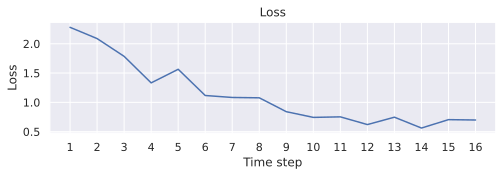

In [ ]:
plt.figure(figsize=(8, 2))
plt.plot((range(1,len(loss_list)+1)), loss_list, 'b')

xint= range(1,len(loss_list)+1)
plt.xticks(xint)

plt.xlabel("Time step")
plt.ylabel("Loss")

plt.title("Loss")

plt.show()

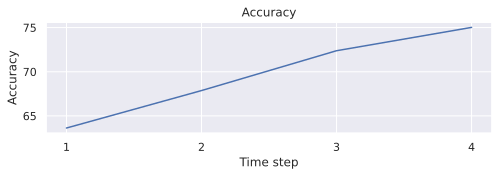

In [ ]:
plt.figure(figsize=(8, 2))
plt.plot((range(1,len(accuracy_list)+1)), accuracy_list)

xint= range(1,len(accuracy_list)+1)
plt.xticks(xint)

plt.xlabel("Time step")
plt.ylabel("Accuracy")

plt.title("Accuracy")

plt.show()

####Saving & Loading Model

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
#Save
torch.save(my_nn.state_dict(), "NN_1.pth")
print("Saved PyTorch Model")

Saved PyTorch Model


In [ ]:
#Load
NN2 =  Fashion_NN()#TheModelClass(*args, **kwargs)
NN2.load_state_dict(torch.load("NN_1.pth"))

<All keys matched successfully>

In [ ]:
NN2.eval()

Fashion_NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
)